# Unsupervised Learning Challenge
#### Glen Dagger

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Part 1: Prepare the Data

In [56]:
# Read in myopia dataset
df = pd.read_csv("./Resources/myopia.csv")

# Preview dataframe
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [57]:
# Remove "MYOPIC" column from dataframe
X = df.drop("MYOPIC", axis=1)

# Preview dataframe
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [58]:
# Standardize dataset

data_scaled = StandardScaler().fit_transform(X)

print("Scaled dataframe shape:", data_scaled.shape)

Scaled dataframe shape: (618, 14)


### Part 2: Apply Dimensionality Reduction

In [59]:
# Apply PCA for dimensionality reduction from 14 to 10

# Initialize PCA model to preserve 90% of explained variance (10 components)
pca = PCA(n_components=0.9)

# Get principal components for the standardized myopia data
myopia_pca = pca.fit_transform(data_scaled)

In [60]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca
)

# Preview PCA dataframe
df_myopia_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [61]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=800)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

# Check for reduced number of features (2 columns)
print("TSNE Data Shape", tsne_features.shape)

/Users/glena.dagger/Downloads/anaconda3/envs/PythonDataOne/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


TSNE Data Shape (618, 2)


In [62]:
# Prepare to plot dataset

# Store first column of transformed features as 'x'
df_myopia_pca["x"] = tsne_features[:,0]

# Store second column of transformed features as 'y'
df_myopia_pca["y"] = tsne_features[:,1]

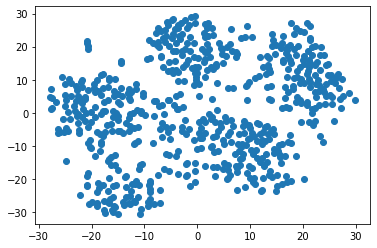

In [63]:
# Visualize the clusters
plt.scatter(df_myopia_pca["x"], df_myopia_pca["y"])
plt.show()

There appear to be roughly 5 distinct clusters in the scatter plot.

### Part 3: Perform a Cluster Analysis with K-Means

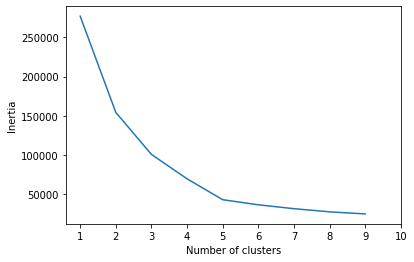

In [64]:
# Finding the best value for k
inertia = []
k = list(range(1,10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}

# Define a DataFrame to plot the Elbow Curve using MatPlotLib
df_elbow = pd.DataFrame(elbow_data)

# Plot Elbow Curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [65]:
# Initializing model with K = 5
model_km = KMeans(n_clusters=5, random_state=1)

# Fitting model
model_km.fit(tsne_features)

# Create dataframe of tSNE features
km_data = pd.DataFrame(tsne_features)

# Add the predicted class column to the dataframe
km_data["class"] = model_km.labels_

# Preview dataframe
km_data.head()


,0,1,class
0,-2.853624,-5.405076,0
1,-22.612587,-0.232450,2
2,18.155252,8.062902,1
3,-9.397251,16.309847,4
4,3.779416,-16.162811,0


### Part 4: Make a Recommendation

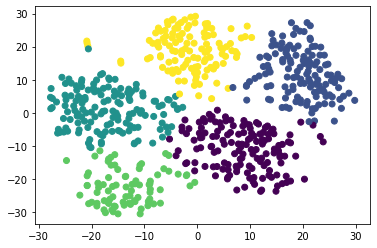

In [66]:
# Visualize the clusters
plt.scatter(km_data[0], km_data[1], c=km_data["class"])
plt.show()

Based on the above analysis, it appears that the patients can indeed be clustered. The scatter plot shown directly above shows that after dimensionality reduction and K-clustering, there are five distinct and non-overlapping clusters.